# 중심차분  
$f'(x)=\lim_{h⟶0}\frac{f(x+h)-f(x-h)}{2h}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 기울기 구하는 함수
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [ ]:
def f1(x):
    return 0.01*x**2+0.01*x

$f(x)=0.01x^2+0.01x$

Text(0, 0.5, 'y')

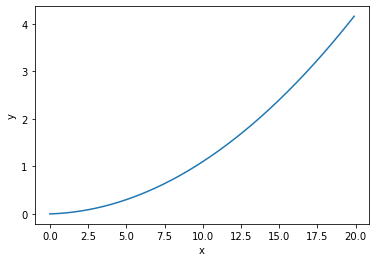

In [ ]:
# f1 그래프 그려보자
x=np.arange(0.0,20.0,0.1)
y=f1(x)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# x=7.5에서의 기울기
numerical_diff(f1,x=7.5)

0.1599999999996049

$f'(x)=0.02x+0.01$

In [ ]:
0.02*7.5+0.01

0.16

비슷함

# 편미분

In [ ]:
def f2(x):
    return x[0]**2+x[1]**2

$f(x)=x_0^2+x_1^2$  
$→\frac{dy}{dx_0}=2x_0$  
$→\frac{dy}{dx_1}=2x_1$

In [ ]:
# x=(3,4)에서 미분계수
def f2_temp0(x0):
    return x0**2+4**2

def f2_temp1(x1):
    return 3**2+x1**2

In [ ]:
numerical_diff(f2_temp0,3)

6.00000000000378

In [ ]:
numerical_diff(f2_temp1,4)

7.999999999999119

# 편미분을 이용한 기울기

In [ ]:
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x) # x크기의 0으로 채워진 배열

    for index in range(len(x)):
        tmp=x[index]
        
        x[index]=tmp+h
        fxh1=f(x)

        x[index]=tmp-h
        fxh2=f(x)

        grad[index]=(fxh1-fxh2)/(2*h)
        x[index]=tmp
    
    return grad

In [ ]:
x=np.array([3.0,4.0])
numerical_gradient(f2,x)

array([6., 8.])

In [ ]:
x=np.array([0.0,2.0])
numerical_gradient(f2,x)

array([0., 4.])

# 경사하강법

In [ ]:
def gradient_descent(f,init_x,lr,step_num):
    x=init_x.copy()

    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad
    return x

$W=W-\alpha\times\frac{\partial }{\partial W}cost(W)$

In [ ]:
init_x=np.array([-3.0,4.0])
gradient_descent(f2,init_x=init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
gradient_descent(f2,init_x=init_x,lr=10.0,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

# 신경망 구현

In [ ]:
def cross_entropy_error(y_pred,y_true):
    delta=1e-7
    return -np.sum(y_true*np.log(y_pred+delta))

In [ ]:
def softmax(x):
    c=np.max(x)
    exp_x=np.exp(x-c)
    sum_exp_x=np.sum(exp_x)
    y=exp_x/sum_exp_x

    return y

In [ ]:
class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3) # 2x3 랜덤 배열 생성

    def predict(self,x):
        y_pred=np.dot(x,self.W)

        return y_pred

    def loss(self,x,y_true):
        y_pred=self.predict(x)
        y_pred=softmax(y_pred)
        loss=cross_entropy_error(y_pred,y_true)
        return loss

In [ ]:
net=simpleNet()

In [ ]:
net.W

array([[ 1.15984621, -1.05057257,  0.77571874],
       [ 0.72997831, -0.9487357 , -0.1532352 ]])

In [ ]:
x=np.array([0.6,0.9])
y_pred=net.predict(x)
y_pred

array([ 1.35288821, -1.48420567,  0.32751957])

In [ ]:
y_true=np.array([1,0,0])

In [ ]:
net.loss(x,y_true)

0.34872523738363315

# 손실함수 + 기울기구하기

In [ ]:
# 신경망에서 손실함수 가져오기
x=np.array([0.6,0.9])
y_true=np.array([1,0,0])

def f(x):
    return net.loss(x,y_true)

In [ ]:
f(x)

0.34872523738363315

In [ ]:
# 기울기 구하는 함수
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x)

    for index,value in np.ndenumerate(x):
        tmp=value.copy()
        
        x[index]=tmp+h
        fhx1=f(x)

        x[index]=tmp-h
        fhx2=f(x)

        grad[index]=(fhx1-fhx2)/(2*h)
        x[index]=tmp 
    return grad

In [ ]:
# np.ndenumerate 참고
for index,value in np.ndenumerate(net.W):
    print(index,value)

(0, 0) 1.159846213724763
(0, 1) -1.050572572221254
(0, 2) 0.7757187447104228
(1, 0) 0.7299783101255167
(1, 1) -0.9487356967331527
(1, 2) -0.15323520063611265


In [40]:
numerical_gradient(f,x) # x=np.array([0.6,0.9])에서의 미분계수

array([-0.18859899, -0.29291907])